In [1]:
import sys
from pathlib import Path
path_root = '../'
sys.path.append(str(path_root))

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from one.api import ONE
from brainbox.io.one import SessionLoader, SpikeSortingLoader
from iblatlas.atlas import AllenAtlas
from utils.ibl_data_utils import (
    load_spiking_data, load_trials_and_mask, merge_probes,
    load_trial_behaviors, load_anytime_behaviors,
    prepare_data, 
    select_brain_regions, list_brain_regions, 
    bin_spiking_data, save_data, save_imposter_sessions
)

### Data Caching

In [2]:
# Instantiate ONE
ONE.setup(base_url='https://openalyx.internationalbrainlab.org', 
          silent=True, 
          cache_dir='/mnt/3TB/yizi/Downloads/ONE/openalyx.internationalbrainlab.org'
)
one = ONE(password='international')
ba = AllenAtlas()

/home/yizi/anaconda3/envs/clusterless/lib/python3.8/site-packages/one/params.py:184: UserWarning: Warning: the directory provided is already a cache for another URL.
  warnings.warn('Warning: the directory provided is already a cache for another URL.')


In [4]:
freeze_file = '../data/2023_12_bwm_release.csv'
bwm_df = pd.read_csv(freeze_file, index_col=0)

In [67]:
# Load an example session
idx = 250
pid = bwm_df.pid[idx]
eid, probe = one.pid2eid(pid)

In [68]:
params = {
    # setup for trial decoding:
    'align_time': 'firstMovement_times',
    'time_window': (0., 1.),
    'binsize': 0.02,
    'single_region': False # use all available regions
}

In [69]:
trials, mask = load_trials_and_mask(one, eid, min_rt=0.08, max_rt=2., nan_exclude='default')

In [70]:
neural_dict, behave_dict, metadata = prepare_data(one, eid, bwm_df, params)

Merged 2 probes for session eid: 3f859b5c-e73a-4044-b49e-34bb81e96715


/mnt/3TB/yizi/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS094/2022-06-17/001/alf/_ibl_rightCamera.times.npy: 100%|███████████████████████████| 5.00M/5.00M [00:00<00:00, 13.7MB/s]
/mnt/3TB/yizi/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS094/2022-06-17/001/alf/rightCamera.ROIMotionEnergy.npy: 100%|██████████████████████| 5.00M/5.00M [00:00<00:00, 8.80MB/s]
/mnt/3TB/yizi/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS094/2022-06-17/001/alf/_ibl_rightCamera.features.pqt: 100%|████████████████████████| 7.95M/7.95M [00:00<00:00, 16.0MB/s]
/mnt/3TB/yizi/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS094/2022-06-17/001/alf/_ibl_rightCamera.dlc.pqt: 100%|█████████████████████████████| 94.1M/94.1M [00:01<00:00, 54.9MB/s]


In [71]:
regions, beryl_reg = list_brain_regions(neural_dict, **params)
region_cluster_ids = select_brain_regions(neural_dict, beryl_reg, regions, **params)

Use spikes from brain regions:  ['AUDd' 'AUDp' 'AUDv' 'CA1' 'CA2' 'CA3' 'ECT' 'LD' 'PERI' 'PO' 'SSp-bfd'
 'SSp-tr' 'SSs' 'TEa' 'VISa' 'root']


In [72]:
binned_spikes, clusters_used_in_bins = bin_spiking_data(region_cluster_ids, neural_dict, trials, **params)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:18<00:00, 25.79it/s]


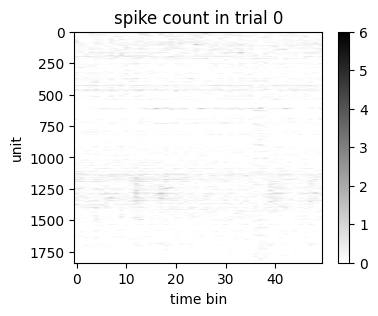

In [73]:
trial_idx = 0
plt.figure(figsize=(4,3))
plt.imshow(binned_spikes[trial_idx].T, aspect="auto", cmap="binary")
plt.title(f"spike count in trial {trial_idx}")
plt.xlabel("time bin")
plt.ylabel("unit")
plt.colorbar();

In [74]:
binned_behaviors = load_trial_behaviors(one, eid, trials, allow_nans=True, **params)

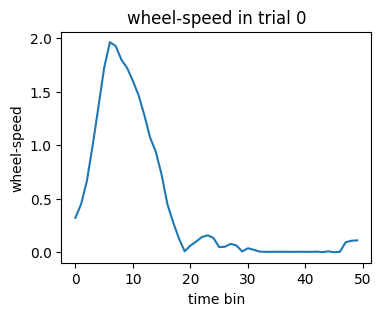

In [75]:
behave = "wheel-speed"
plt.figure(figsize=(4,3))
plt.plot(binned_behaviors[behave][trial_idx])
plt.title(f"{behave} in trial {trial_idx}")
plt.xlabel("time bin")
plt.ylabel(behave);

In [3]:
base_dir = Path('/mnt/3TB/yizi/shared_decoding')
data_dir = base_dir/'data'
imposter_dir = base_dir/'imposter'
save_data(eid, binned_spikes, binned_behaviors, save_path=data_dir)

### Imposter Caching

In [4]:
save_imposter_sessions(data_dir, imposter_dir, n_samples=2)

Created 2 imposter sessions for eid: d32876dd-8303-4720-8e7e-20678dc2fd71
Created 2 imposter sessions for eid: 03d9a098-07bf-4765-88b7-85f8d8f620cc
Created 2 imposter sessions for eid: 3f859b5c-e73a-4044-b49e-34bb81e96715
Created 2 imposter sessions for eid: 8c33abef-3d3e-4d42-9f27-445e9def08f9
Created 2 imposter sessions for eid: 12dc8b34-b18e-4cdd-90a9-da134a9be79c
Created 2 imposter sessions for eid: cc45c568-c3b9-4f74-836e-c87762e898c8
